# Partial Least Squares Regression

### Author: Nhan TV

#### Master Student of Data Science, VNU - HUS

## 1. Partial Least Squares (PLS) Regression

In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [433]:
"""We have column vectors and need to create a matrix that it's columns are these vectors"""
def transfrom_list_to_matrix(A):
    D = []
    for x in A:
        c = (x.T)[0].tolist() # Tranform a column vector to a row vector and change it to list
        D.append(c)  # Append a row vector to a column of list D
    D = np.array(D)  # Change the list D to the matrix
    D = D.T
    return(D)

In [434]:
def PLS (X, Y, ncomp):
    """Define E, F, W, t, p, q are matrice zeros with size of (1, ncomp)"""
    E = [0]*ncomp
    F = [0]*ncomp
    W = [0]*ncomp
    T = [0]*ncomp
    t = [0]*ncomp
    p = [0]*ncomp
    q = [0]*ncomp
    E[0] = X # Let the start E is X
    F[0] = Y # Let the start F is Y
    """Singular Value Decomposition for X^TY"""
    u, s, vh = np.linalg.svd(np.dot(X.T, Y), full_matrices=False)
    
    W[0] = (np.array([(u.T)[0]])).T # Take the first left singular vector of the SVD
    
    for k in range(0, ncomp):
        """Nomarlize t(k), then compute p(k), q(k)"""
        t[k] = np.dot(E[k], W[k]) 
        T[k] = np.dot(t[k].T, t[k])
        t[k] = t[k]/T[k]
        p[k] = np.dot(E[k].T, t[k])
        q[k] = np.dot(F[k].T, t[k])
        """ Deflate X, Y to E, E after each iteration"""
        if k < ncomp-1:
            
            E[k+1] = E[k] - np.dot(T[k]*t[k], p[k].T) # Deflate E(k) to E(k+1)
            F[k+1] = F[k] - np.dot(T[k]*t[k], q[k].T) # Deflate F(k) to F(k+1)
            a, b, v = np.linalg.svd(np.dot(E[k+1].T, F[k+1]), full_matrices=False) # SVD for E(k+1).TF(k+1)
            W[k+1] = (np.array([(a.T)[0]])).T # Choose the next omega
    """Define W to be the matrix with columns omega(1), ..., omega(2). Do the same to form the p, q matrix."""
    W = transfrom_list_to_matrix(W)
    p = transfrom_list_to_matrix(p)
    q = transfrom_list_to_matrix(q)
    
    R = np.dot(W, np.linalg.inv(np.dot(p.T, W)))
    B = np.dot(R,q.T) # Coefficient of PLS regression 
    
    return (B)

In [435]:
"""Computing the lost of model"""
def get_lost(Y, Y_pred):
    cost = 1/2*(np.linalg.norm(Y-Y_pred))**2
    return (cost)

In [436]:
"""Valuating model"""
def value_model(Y, Y_pred):
    count = 0
    N = len(Y)
    for i in range(N):
        if Y[i] == Y_pred[i]:
            count = count + 1
    value = count/N
    return (value)

## 2. Application

### 2.1. Testing the algorithms:

In [353]:
np.random.seed()

In [354]:
X = np.random.normal(0, 1,(20, 5)).T

In [355]:
X.shape

(5, 20)

In [356]:
Y = np.random.normal(0, 1,(10, 5)).T

In [357]:
Y

array([[-0.00521705, -0.57378278,  0.55944185, -1.87362202, -0.62310944,
         0.95991166,  0.43150038, -0.75214945, -1.27018678,  1.64013452],
       [ 0.88825866, -1.22682784,  1.99674005,  1.43883889,  0.66673149,
        -0.346303  ,  0.68142177, -0.22047837, -0.74524873,  1.38017834],
       [-2.72093709, -1.01549088,  3.16344374,  0.20235149,  0.74086033,
         1.05988338, -0.26800485, -0.50283108, -0.32829583,  0.12516068],
       [-0.55802229, -1.85714948,  1.39538619,  1.11104549,  0.2366401 ,
        -0.20897577, -0.63007081,  0.76734724,  0.60189501,  0.9925377 ],
       [ 1.4397571 , -0.55616023, -0.07800116, -0.73470185,  0.052217  ,
         2.48839691,  0.14300424,  0.98007155, -0.29984804, -1.3797248 ]])

In [377]:
B_1 = PLS(X, Y, 4)

In [378]:
Y_pred_1 = np.dot(X, B_1)
Y_pred_1

array([[-0.06740217, -0.48882937,  0.6612367 , -1.87417126, -0.57395413,
         0.9748425 ,  0.49710477, -0.85836183, -1.3523154 ,  1.60683454],
       [ 1.0868264 , -1.49809864,  1.67169169,  1.4405927 ,  0.50977016,
        -0.39397973,  0.47193574,  0.11867595, -0.482998  ,  1.48651086],
       [-2.48441937, -1.33860657,  2.77627259,  0.20444049,  0.55390077,
         1.00309473, -0.51752755, -0.09885806, -0.01592411,  0.25181533],
       [-1.00352358, -1.24853355,  2.12465602,  1.1071107 ,  0.58879436,
        -0.10200951, -0.16007354,  0.00642967,  0.01351626,  0.75397288],
       [ 1.3822706 , -0.47762579,  0.0161022 , -0.73520959,  0.09765821,
         2.5021996 ,  0.20365164,  0.88188443, -0.37577113, -1.41050867]])

In [379]:
get_lost(Y, Y_pred_1)

1.849702347199281

In [380]:
B_2 = PLS(X, Y, 5)

In [381]:
Y_pred_2 = np.dot(X, B_2)
Y_pred_2

array([[-0.00521705, -0.57378278,  0.55944185, -1.87362202, -0.62310944,
         0.95991166,  0.43150038, -0.75214945, -1.27018678,  1.64013452],
       [ 0.88825866, -1.22682784,  1.99674005,  1.43883889,  0.66673149,
        -0.346303  ,  0.68142177, -0.22047837, -0.74524873,  1.38017834],
       [-2.72093709, -1.01549088,  3.16344374,  0.20235149,  0.74086033,
         1.05988338, -0.26800485, -0.50283108, -0.32829583,  0.12516068],
       [-0.55802229, -1.85714948,  1.39538619,  1.11104549,  0.2366401 ,
        -0.20897577, -0.63007081,  0.76734724,  0.60189501,  0.9925377 ],
       [ 1.4397571 , -0.55616023, -0.07800116, -0.73470185,  0.052217  ,
         2.48839691,  0.14300424,  0.98007155, -0.29984804, -1.3797248 ]])

In [382]:
get_lost(Y, Y_pred_2)

2.3550305214204424e-30

With only iteration = 5, we can preserve almost information of the model.

### 2.2.  Application

Data is a 64 by 6830 matrix of the expression values while labs is a vector listing the cancer types for the 64 cell lines.

In [437]:
df = pd.read_csv("D:/Data Science/Data Science Core/Documents/Du Lieu Trong NCKH - Trinh Quoc Anh, PhD/NCI60.csv")

In [438]:
df

,Unnamed: 0,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-4.500000e-01,...,0.000000,3.000000e-02,-0.175000,0.629981,-3.000000e-02,0.000000,2.800000e-01,-0.340000,-1.930000,CNS
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-4.003899e-02,...,-0.300039,-2.500390e-01,-0.535039,0.109941,-8.600390e-01,-1.250049,-7.700390e-01,-0.390039,-2.000039,CNS
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,4.300000e-01,...,0.120000,-7.400000e-01,-0.595000,-0.270020,-1.500000e-01,0.000000,-1.200000e-01,-0.410000,0.000000,CNS
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,2.000000e-02,...,-0.110000,-1.600000e-01,0.095000,-0.350020,-3.000000e-01,-1.150010,1.090000e+00,-0.260000,-1.100000,RENAL
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,2.350000e-01,...,-0.775000,-5.150000e-01,-0.320000,0.634980,6.050000e-01,0.000000,7.450000e-01,0.425000,0.145000,BREAST
5,V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-7.700000e-01,...,0.000000,-7.400000e-01,-2.095000,-1.390020,-4.000000e-01,0.699990,2.900000e-01,0.550000,0.000000,CNS
6,V7,-0.830000,0.000000,0.130000,-1.630000,0.075000,-3.600000e-01,0.100000,0.155000,-2.900000e-01,...,-0.220000,-3.000000e-02,-0.495000,0.929980,4.700000e-01,0.129990,-3.000000e-01,0.570000,0.000000,CNS
7,V8,-0.190000,-0.870000,-0.450000,0.080000,0.005000,3.500000e-01,-0.040000,-0.265000,-3.100000e-01,...,-0.170000,-4.200000e-01,-0.395000,-0.570020,-9.000000e-02,-0.700010,-5.400000e-01,-0.450000,-2.090000,BREAST
8,V9,0.460000,0.000000,1.150000,-1.400000,-0.005000,-7.000000e-01,-0.920000,-0.515000,-2.800000e-01,...,0.560000,4.100000e-01,0.705000,-0.200019,-3.300000e-01,-0.600010,8.300000e-01,-0.030000,0.650000,NSCLC
9,V10,0.760000,1.490000,0.280000,0.100000,-0.525000,3.600000e-01,0.600000,0.175000,5.800000e-01,...,-0.590000,-4.100000e-01,-0.375000,-1.150020,-3.300000e-01,-1.220010,-1.700000e-01,-0.110000,-1.790000,NSCLC


In [439]:
df.shape

(64, 6832)

Creating the matrice X and Y from above data frame.

In [440]:
X = df.iloc[:, 1:6831]
X = X.as_matrix() # Change a data frame to a matrix
X = (X - X.mean(axis = 1, keepdims = True))/X.std(axis = 1, keepdims = True) # Normalize the X matrix in row
X

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[ 0.32394857,  1.5385892 ,  0.66901693, ...,  0.29634311,
        -0.55942643, -2.7540612 ],
       [ 0.81575739,  1.6066258 ,  0.15453954, ..., -1.06417571,
        -0.57150358, -2.65887757],
       [ 1.27795176, -0.16520777, -0.3566473 , ..., -0.28301671,
        -0.71007412, -0.1063033 ],
       ...,
       [ 0.18591875, -0.93415339, -0.29989567, ...,  0.11844452,
         2.64198055,  5.21949595],
       [-0.08776502,  0.14481272, -0.13672875, ..., -0.6263661 ,
        -0.01431942, -2.13200094],
       [ 0.43003751, -0.42960797, -0.02751573, ...,  0.34684601,
        -0.26322498,  1.62244898]])

In [441]:
Y = df["labs"]
Y = Y.astype("category").cat.codes # Factorizing Y
Y = Y.as_matrix()
Y = Y.reshape(64, 1)
Y

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 1],
       [ 1],
       [ 1],
       [12],
       [ 0],
       [ 1],
       [ 1],
       [ 0],
       [ 9],
       [ 9],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [ 0],
       [ 9],
       [12],
       [13],
       [10],
       [ 8],
       [11],
       [10],
       [10],
       [10],
       [10],
       [10],
       [11],
       [ 9],
       [ 9],
       [ 9],
       [ 5],
       [ 4],
       [ 3],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 6],
       [ 0],
       [ 7],
       [ 0],
       [ 9],
       [ 9],
       [ 9],
       [ 8],
       [ 0],
       [ 0],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 8]], dtype=int8)

Valuating model 

In [442]:
theta_1 = PLS(X, Y, 22)
theta_1

array([[-0.00466543],
       [-0.00642772],
       [-0.00261597],
       ...,
       [-0.00730325],
       [ 0.00163333],
       [ 0.00163547]])

In [443]:
Y_pred_1 = np.dot(X, theta_1)
Y_pred_1 = Y_pred_1.round(3)
Y_pred_1

array([[ 1.],
       [ 1.],
       [ 1.],
       [12.],
       [-0.],
       [ 1.],
       [ 1.],
       [-0.],
       [ 9.],
       [ 9.],
       [12.],
       [12.],
       [12.],
       [12.],
       [12.],
       [12.],
       [12.],
       [-0.],
       [ 9.],
       [12.],
       [13.],
       [10.],
       [ 8.],
       [11.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [11.],
       [ 9.],
       [ 9.],
       [ 9.],
       [ 5.],
       [ 4.],
       [ 3.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 6.],
       [-0.],
       [ 7.],
       [ 0.],
       [ 9.],
       [ 9.],
       [ 9.],
       [ 8.],
       [-0.],
       [ 0.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.]])

In [444]:
value_model(Y, Y_pred_1)

1.0

Find the number of component that accuracy  of model is the best

In [474]:
def evaluate(X, Y):
    value = []
    tick = np.arange(10, 26, 1)
    for ncomp in range(10,26):
        theta = PLS(X, Y, ncomp)
        y_pred = np.dot(X, theta).round(3)
        value.append(value_model(Y, y_pred))
    print(value)
    plt.plot(tick, value, label = "Value of the model")
    plt.xlabel("Number of Component")
    plt.ylabel("Accuracy")

[0.0, 0.0, 0.0, 0.03125, 0.046875, 0.15625, 0.203125, 0.34375, 0.515625, 0.65625, 0.828125, 0.953125, 1.0, 1.0, 1.0, 1.0]


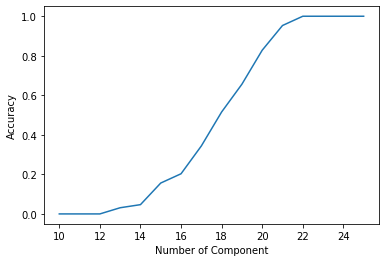

In [475]:
evaluate(X, Y)